<a href="https://colab.research.google.com/github/PandaNotPanda/CSE508_Winter2023_A3_39/blob/main/IR_A3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://snap.stanford.edu/data/ca-GrQc.txt.gz
!gunzip ca-GrQc.txt.gz

--2023-04-26 09:46:50--  https://snap.stanford.edu/data/ca-GrQc.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109261 (107K) [application/x-gzip]
Saving to: ‘ca-GrQc.txt.gz’

ca-GrQc.txt.gz      100%[===================>] 106.70K   434KB/s    in 0.2s    

2023-04-26 09:46:51 (434 KB/s) - ‘ca-GrQc.txt.gz’ saved [109261/109261]



In [3]:
import numpy as np
import matplotlib.pyplot as plt

# load the dataset
with open('ca-GrQc.txt', 'r') as f:
    data = [tuple(map(int, line.strip().split())) for line in f.readlines()[4:]]

In [4]:
# extract the nodes
nodes = np.unique(np.array(data).flatten())

# get the number of nodes
num_nodes = len(nodes)

In [5]:
# read the edges from the file
edges = []
with open('ca-GrQc.txt', 'r') as f:
    for line in f:
        if line[0] == "#":
            continue
        edge = tuple(map(int, line.strip().split("\t")))
        edges.append(edge)

In [6]:
# create a mapping from node to index
node_to_index = {node: index for index, node in enumerate(sorted(nodes))}

# create the adjacency matrix
adj_matrix = np.zeros((num_nodes, num_nodes), dtype=int)

for edge in data:
    adj_matrix[node_to_index[edge[0]], node_to_index[edge[1]]] = 1
    adj_matrix[node_to_index[edge[1]], node_to_index[edge[0]]] = 1

print('Adjacency matrix:')
print(adj_matrix)

Adjacency matrix:
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
# calculate the in-degrees
in_degrees = np.sum(adj_matrix, axis=0)
# calculate the average in-degree
avg_in_degree = np.mean(in_degrees)

# calculate the out-degrees
out_degrees = np.sum(adj_matrix, axis=1)
# calculate the average out-degree
avg_out_degree = np.mean(out_degrees)

# calculate the density of the network
density = len(edges) / (len(nodes) * (len(nodes) - 1))

#find the node with the highest in-degree
max_in_degree_node = np.argmax(in_degrees)
#find the node with the highest out-degree
max_out_degree_node = np.argmax(out_degrees)

In [8]:
#Number of nodes
print(f"Number of nodes: {num_nodes}")

#Number of edges
print(f"Number of edges: {len(edges)}")

# print the average in-degree
print(f"Average In-Degree: {avg_in_degree}")

#print the average out-degree
print(f"Average Out-Degree: {avg_out_degree}")

#print the node with the highest in-degree
print(f"Node with the highest in-degree: {max_in_degree_node}")

#print the node with the highest out-degree
print(f"Node with the highest out-degree: {max_out_degree_node}")

#print the density
print(f"Network Density: {density}")

Number of nodes: 5242
Number of edges: 28980
Average In-Degree: 5.528424265547501
Average Out-Degree: 5.528424265547501
Node with the highest in-degree: 4233
Node with the highest out-degree: 4233
Network Density: 0.0010548414931401452


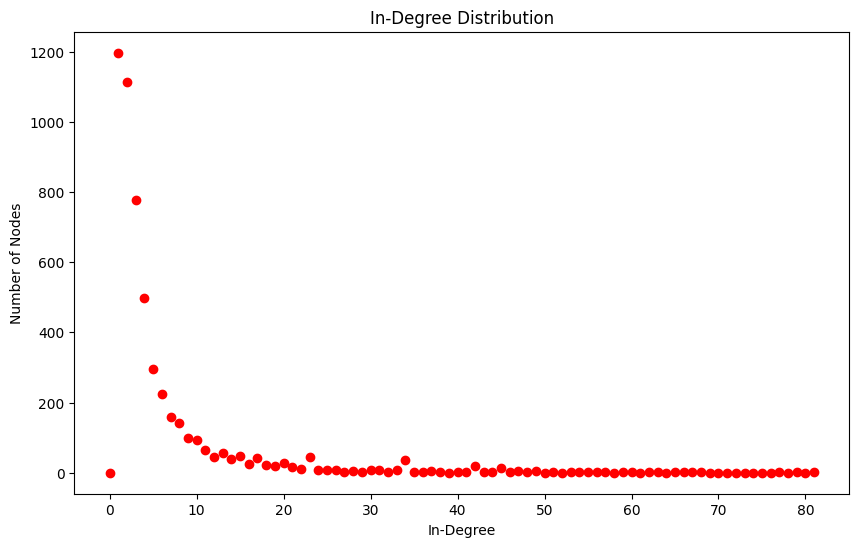

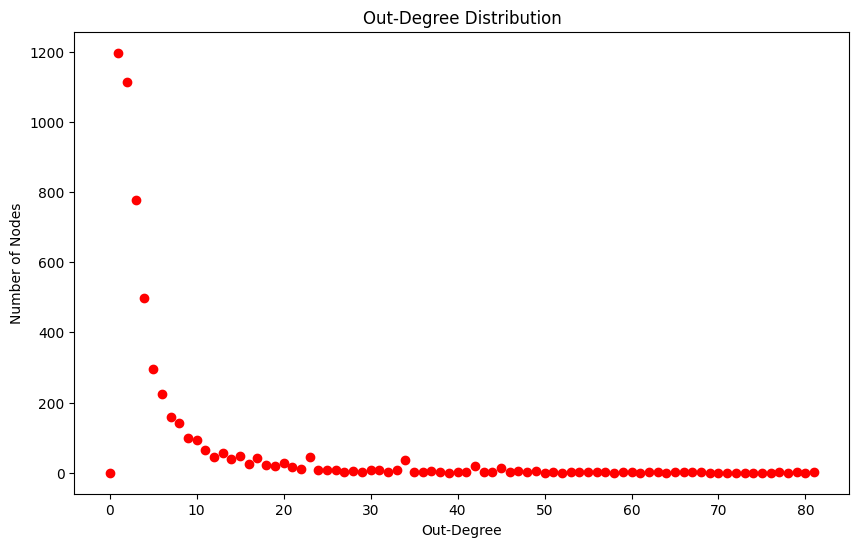

In [9]:
# calculate the in-degree distribution
in_degree_dist = np.bincount(in_degrees)
# calculate the out-degree distribution
out_degree_dist = np.bincount(out_degrees)

# plot the in-degree distribution
plt.figure(figsize=(10, 6))
plt.plot(in_degree_dist, 'ro')
plt.xlabel("In-Degree")
plt.ylabel("Number of Nodes")
plt.title("In-Degree Distribution")
plt.show()

# plot the out-degree distribution
plt.figure(figsize=(10, 6))
plt.plot(out_degree_dist, 'ro')
plt.xlabel("Out-Degree")
plt.ylabel("Number of Nodes")
plt.title("Out-Degree Distribution")
plt.show()

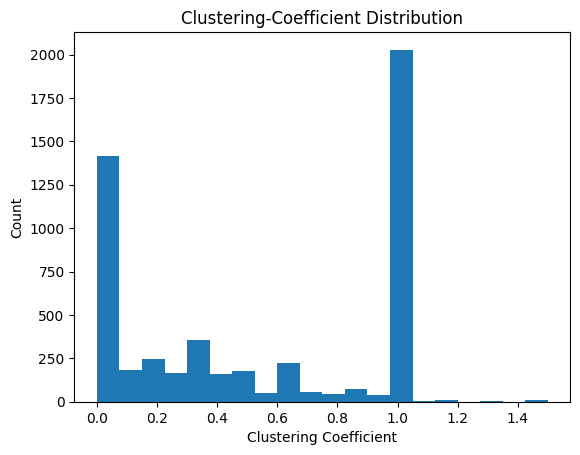

In [10]:
# calculate the local clustering coefficient of each node
clustering_coeffs = {}
for i in range(len(nodes)):
    node = nodes[i]
    neighbors = np.nonzero(adj_matrix[i])[0]
    if len(neighbors) < 2:
        clustering_coeffs[node] = 0
        continue
    edges_between_neighbors = 0
    for j in neighbors:
        for k in neighbors:
            if adj_matrix[j][k]:
                edges_between_neighbors += 1
    clustering_coeffs[node] = edges_between_neighbors / (len(neighbors) * (len(neighbors) - 1))

# plot the clustering-coefficient distribution
plt.hist(clustering_coeffs.values(), bins=20)
plt.title("Clustering-Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Count")
plt.show()